In [1]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
from sentence_transformers import SentenceTransformer

# 모델 로드 및 임베딩 생성
model = SentenceTransformer('sentence-transformers/LaBSE')

/opt/anaconda3/lib/python3.11/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/opt/anaconda3/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sentence_transformers/models/Dense.py:89: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code

In [2]:
from matplotlib import rc

In [ ]:
# 예시 문장들
sentences = ["자동차는 빠르다", "비행기는 빠르다", "택배 배송이 좀 느리다"]
embeddings = model.encode(sentences)


In [3]:
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

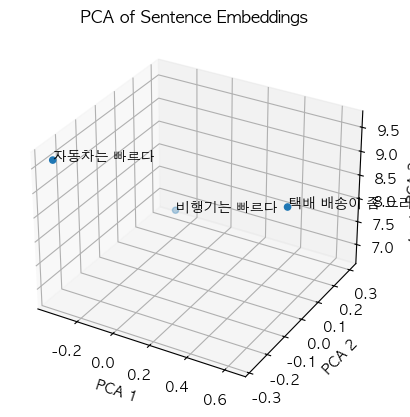

In [40]:
# 3D로 차원 축소 (PCA)
pca = PCA(n_components=3)
pca_result = pca.fit_transform(embeddings)


# 결과 시각화 (PCA)
# plt.figure(figsize=(8, 6))
# plt.scatter(pca_result[:, 0], pca_result[:, 1])
# for i, sentence in enumerate(sentences):
#   plt.annotate(sentence, (pca_result[i, 0], pca_result[i, 1]))
# plt.title("PCA of Sentence Embeddings")
# plt.xlabel("PCA 1")
# plt.ylabel("PCA 2")
# plt.show()

# 결과 시각화 (PCA 3D)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2])
for i, sentence in enumerate(sentences):
    ax.text(pca_result[i, 0], pca_result[i, 1], pca_result[i, 2], sentence)
plt.title("PCA of Sentence Embeddings")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.show()




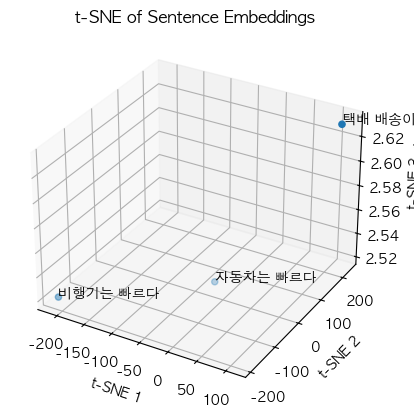

In [43]:
# 3D로 차원 축소 (t-SNE)
perplexity = min(30, len(embeddings) - 1)  # perplexity는 샘플 수보다 작아야 함
tsne = TSNE(n_components=3, perplexity=perplexity)
tsne_result = tsne.fit_transform(embeddings)

# 결과 시각화 (t-SNE 3D)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_result[:, 0], tsne_result[:, 1], tsne_result[:, 2])
for i, sentence in enumerate(sentences):
    ax.text(tsne_result[i, 0], tsne_result[i, 1], tsne_result[i, 2], sentence)
plt.title("t-SNE of Sentence Embeddings")
ax.set_xlabel("t-SNE 1")
ax.set_ylabel("t-SNE 2")
ax.set_zlabel("t-SNE 3")
plt.show()

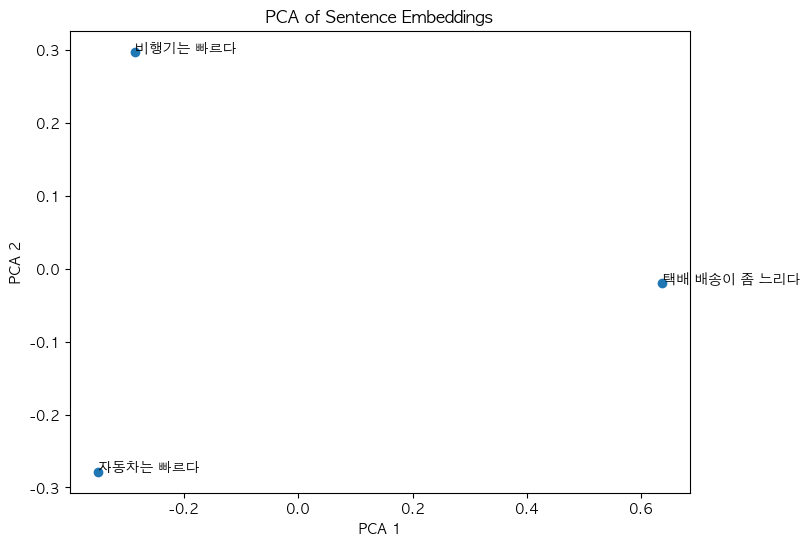

In [55]:
# 2D로 차원 축소 (PCA)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings)

# 결과 시각화 (PCA 2D)
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (pca_result[i, 0], pca_result[i, 1]))
plt.title("PCA of Sentence Embeddings")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

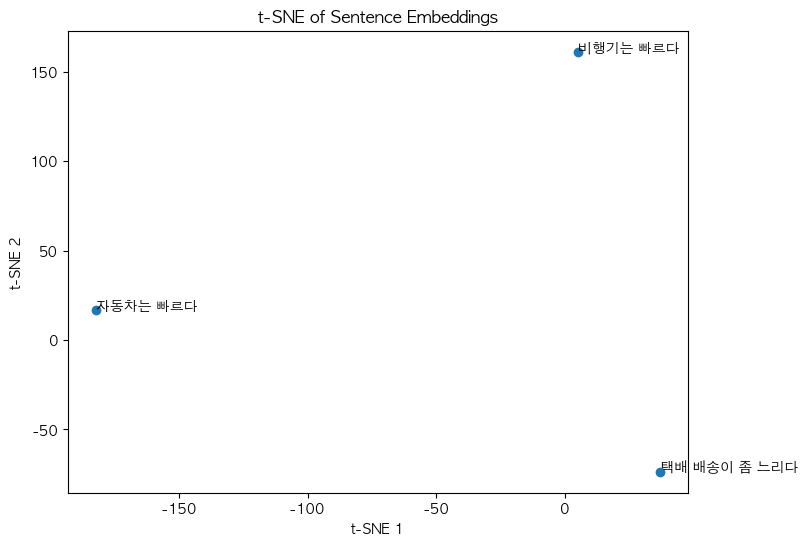

In [52]:
#2D로 차원 축소 (t-SNE)
tsne = TSNE(n_components=2, perplexity=perplexity)
tsne_result = tsne.fit_transform(embeddings)

# 결과 시각화 (t-SNE 2D)
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (tsne_result[i, 0], tsne_result[i, 1]))
plt.title("t-SNE of Sentence Embeddings")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()


In [4]:
## 실제 DB Blob 데이터로 테스트
import sqlite3
import io


In [5]:
conn = sqlite3.connect('./db/server.db')
cur = conn.cursor()
fetch = cur.execute("SELECT title, titleEb FROM article").fetchall()

In [6]:
def blobToNumpy(blob):
  if type(blob) == "<class 'bytes'>":
    return blob
  return np.frombuffer(io.BytesIO(blob).getvalue(), dtype=np.float32)


In [7]:
embeddings = [blobToNumpy(row[1]) for row in fetch]

In [7]:
embeddings

[array([-8.00234824e-03, -3.68501842e-02, -4.33439985e-02, -6.92914426e-02,
        -1.26773939e-02, -1.80647559e-02, -6.77980669e-03, -3.75798829e-02,
         6.42342418e-02, -1.08338650e-02, -2.35733539e-02, -2.90606506e-02,
        -4.89810994e-03, -1.49596278e-02, -1.47523768e-02,  5.75181432e-02,
         3.66294384e-02,  1.94821469e-02, -4.19626758e-02,  6.28441051e-02,
         2.82794368e-02,  5.04021533e-02, -2.89421547e-02, -3.80298980e-02,
        -1.31604588e-02,  1.37985712e-02, -7.77814584e-03, -7.08431453e-02,
        -2.31272029e-03, -2.20208727e-02, -5.77888228e-02, -2.18403023e-02,
         2.39720102e-02, -6.06232919e-02, -3.19824144e-02, -7.25259557e-02,
        -2.12693829e-02,  1.33100143e-02, -4.88569885e-02,  7.38043338e-03,
         3.20556341e-03, -3.66466828e-02, -2.17969548e-02, -8.00064579e-03,
         2.66425963e-02,  1.84634980e-02, -3.48728597e-02, -4.18315865e-02,
         3.35055180e-02, -3.54687311e-02, -5.36496975e-02, -3.25932838e-02,
         2.9

In [8]:
sentences = [row[0] for row in fetch]
sentences

['내가 원하는 캘린더로 학사일정 보기',
 '유전원 USB허브의 역전류를 해결해보자',
 'yt-dlp로 유튜브 영상 다운로드하는 방법',
 '검색엔진이 싫어하는 페이지 만들기',
 'api 없이 무료로 휴대폰 본인인증을 구현하는 방법',
 'Python 설치 및 실행하는 방법',
 '평생 무료 서버 호스팅 만들기 – VPS 서비스 비교',
 '코딩 배우기 시작한 초보자를 위한 8가지 유용한 페이지 모음',
 '오라클 평생 무료 ARM서버 만들기부터 포트열기 까지 A to Z 가이드',
 '해결: “fatal: not a git repository (or any of the parent directories): .git” 오류',
 'Windows Subsystem for Linux2 (WSL 2) 설치 방법',
 '첫 코딩을 배우기 시작할 때 어떤 언어가 적합할까?',
 'Windows, vscode 터미널 꾸미기 : Oh My Posh + iTerm2 테마',
 'gsap로 스크롤 애니메이션 만들기',
 '7만원대 안드8.0 가성비 E북리더 사용기 – 레몬리드 M1',
 'URL에 HTML파일 저장해 호스트하기',
 'Alice60 자작 키보드 만들기 – 3편 조립하기',
 'X로고를 Twitter 로고로 되돌리기(iOS)',
 '안드로이드 상시전원 개조 후 배터리 % 고정시키기',
 'Alice60 자작 아크릴 키보드 만들기 – 2편  PCB 제작하기',
 'Alice60 자작 아크릴 키보드 만들기 – 1편 하우징 설계하기',
 'AltStore를 이용해서 IPA 설치하기 (탈옥 X)',
 'Windows 마우스 커서 초기화되지 않게 바꾸는 방법',
 '현재 Windows 제품 키 찾기',
 'express.js에서 ejs없이 html로 데이터 넘기기(동적 웹 만들기)',
 'Apple Watch에서 2단계 인증번호 발급하기',
 '[Linux Deploy] Socket: Permission denied Error',
 'AccA 로 안드로이드 충전 제

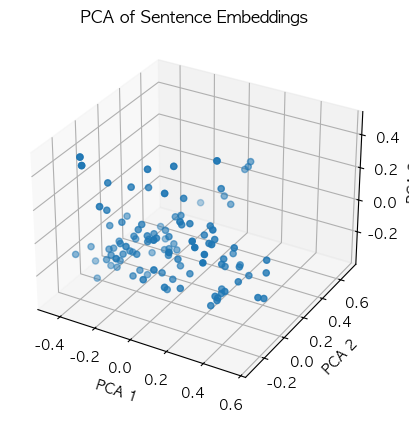

In [101]:
## 3D로 차원 축소 (PCA)
pca = PCA(n_components=3)
pca_result = pca.fit_transform(embeddings)

# 결과 시각화 (PCA 3D)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2])
# for i, sentence in enumerate(sentences):
    # ax.text(pca_result[i, 0], pca_result[i, 1], pca_result[i, 2], sentence)
plt.title("PCA of Sentence Embeddings")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.show()


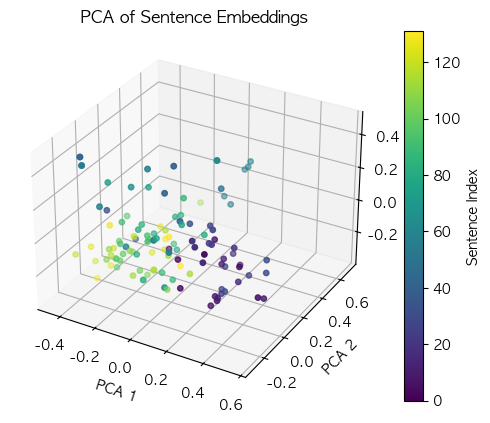

In [9]:
# 3D로 차원 축소 (PCA)
pca = PCA(n_components=3)
pca_result = pca.fit_transform(embeddings)

# 결과 시각화 (PCA 3D)
fig = plt.figure(dpi = 100)
ax = fig.add_subplot(111, projection='3d')

# 색상과 크기를 추가한 산점도
scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], 
                     c=np.arange(len(sentences)), cmap='viridis', s=15)

# 각 점에 레이블 추가
# for i, sentence in enumerate(sentences):
#     ax.text(pca_result[i, 0], pca_result[i, 1], pca_result[i, 2], sentence, fontsize=8)

# 컬러바 추가
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Sentence Index')

# 그래프 제목 및 축 레이블
plt.title("PCA of Sentence Embeddings")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")

# 배경색과 격자선 추가
# ax.set_facecolor('lightgray')

ax.grid(True)

plt.show()

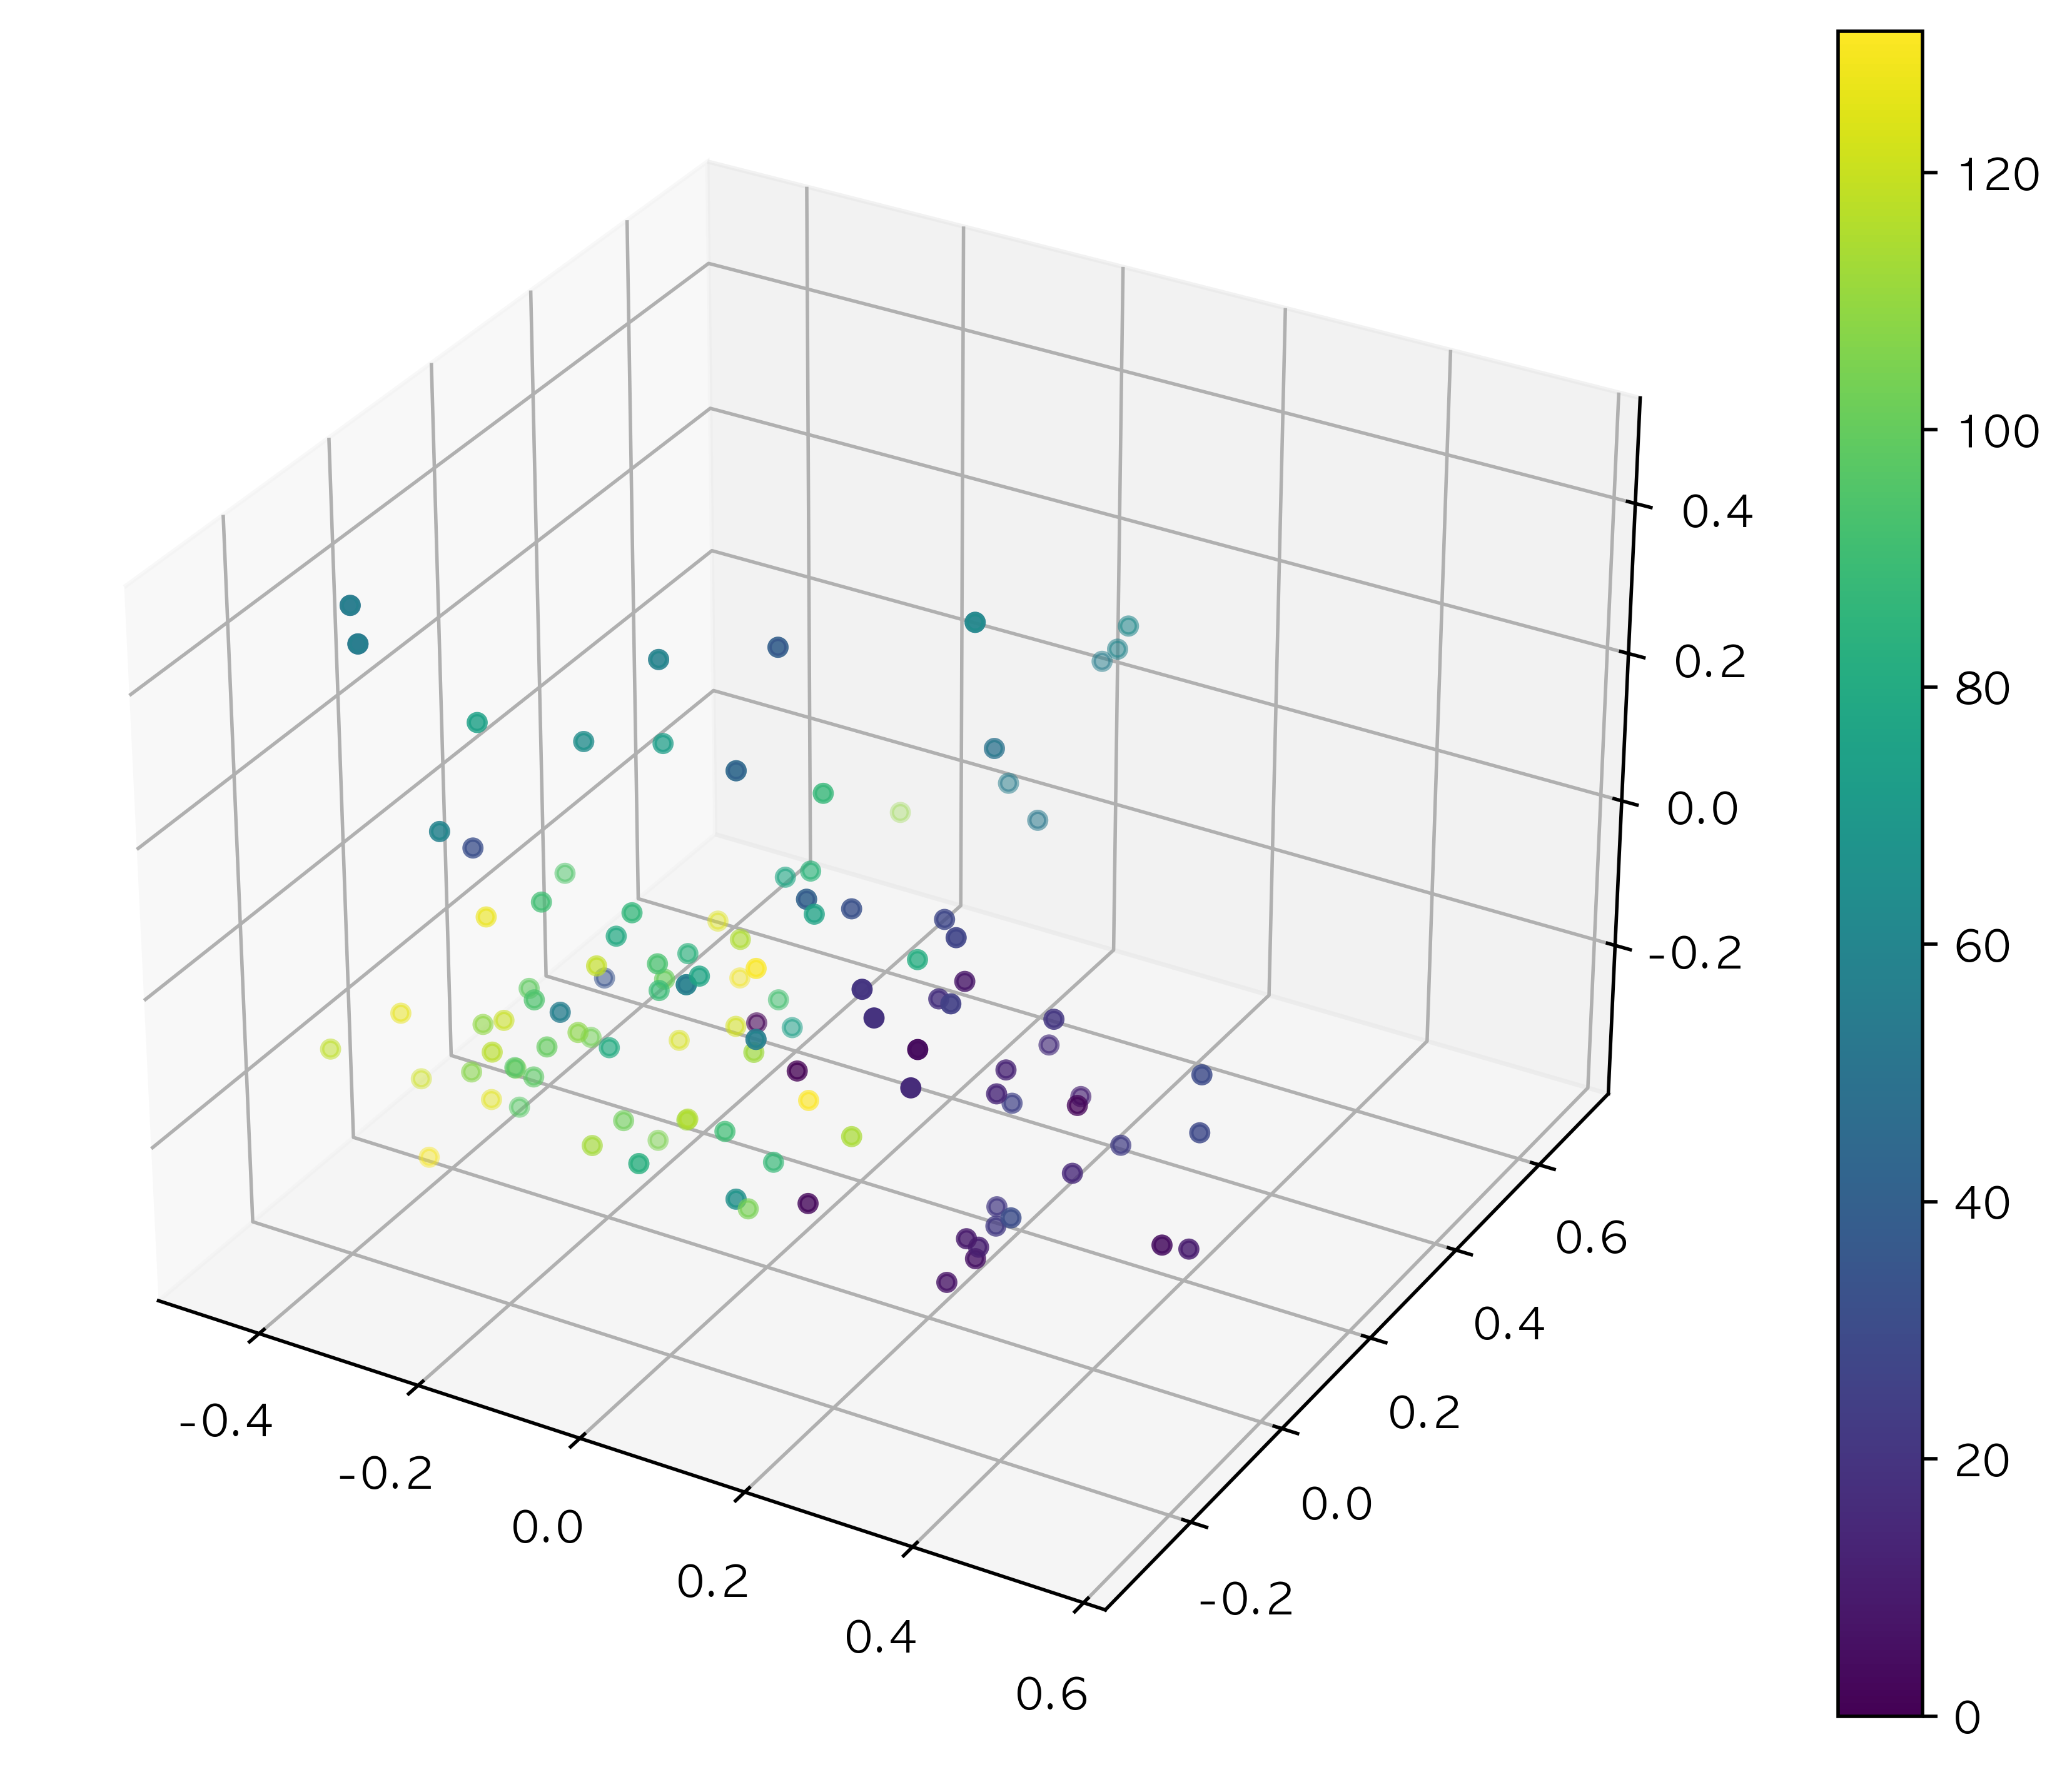

In [12]:
# 3D로 차원 축소 (PCA)
pca = PCA(n_components=3)
pca_result = pca.fit_transform(embeddings)

# 결과 시각화 (PCA 3D)
fig = plt.figure(figsize=(10, 7), dpi=500)
ax = fig.add_subplot(111, projection='3d')

# 색상과 크기를 추가한 산점도
scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], 
                     c=np.arange(len(sentences)), cmap='viridis', s=15)

# 각 점에 레이블 추가
# for i, sentence in enumerate(sentences):
#     ax.text(pca_result[i, 0], pca_result[i, 1], pca_result[i, 2], sentence, fontsize=8)

# 컬러바 추가
cbar = fig.colorbar(scatter, ax=ax)
# cbar.set_label('Sentence Index')

# 그래프 제목 및 축 레이블
# plt.title("PCA of Sentence Embeddings")
# ax.set_xlabel("PCA 1")
# ax.set_ylabel("PCA 2")
# ax.set_zlabel("PCA 3")

# 배경색과 격자선 추가
# ax.set_facecolor('lightgray')

ax.grid(True)

plt.show()

In [102]:
# 3D로 차원 축소 (t-SNE)
perplexity = min(30, len(embeddings) - 1)  # perplexity는 샘플 수보다 작아야 함
tsne = TSNE(n_components=3, perplexity=perplexity)
tsne_result = tsne.fit_transform(embeddings)

# 결과 시각화 (t-SNE 3D)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_result[:, 0], tsne_result[:, 1], tsne_result[:, 2])
# for i, sentence in enumerate(sentences):
    # ax.text(tsne_result[i, 0], tsne_result[i, 1], tsne_result[i, 2], sentence)
plt.title("t-SNE of Sentence Embeddings")
ax.set_xlabel("t-SNE 1")
ax.set_ylabel("t-SNE 2")
ax.set_zlabel("t-SNE 3")
plt.show()

AttributeError: 'list' object has no attribute 'shape'